In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


traing = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/1.Training/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Training_원천데이터/2_센서 데이터/1_자포니카/센서 측정값 데이터/sensor_val_tb.csv")

validation = pd.read_csv("E:/kimwoojae\AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/2.Validation/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Validation_원천데이터/2_센서 데이터/1_자포니카/센서 측정값 데이터/sensor_val_tb.csv")

In [4]:
from sklearn.model_selection import train_test_split
#x = traing[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y = traing[['do_mg']]
#x_train = traing[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y_train = traing[['do_mg']]
#x_test = validation[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y_test = validation[['do_mg']]
x_train = traing[['ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
y_train = traing[['do_mg']]
x_test = validation[['ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
y_test = validation[['do_mg']]
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [33]:
params = {
    'n_estimators':(50, 100, 200, 400),
    'max_depth' : (5, 10, 20, 40),
    'min_samples_leaf' : (10, 20, 40, 80),
    'min_samples_split' : (10, 20, 40, 80)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train.values.ravel())
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 50}
최적 예측 정확도: -0.1917


In [5]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=20, min_samples_split=20,n_estimators=50)
rf_run.fit(x_train, y_train.values.ravel())

#의사결정
dt_model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5)
dt_model.fit(x_train, y_train.values.ravel())

#그래디언트
gb_model = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5, learning_rate= 0.1)
gb_model.fit(x_train, y_train.values.ravel())

GradientBoostingRegressor(max_depth=5, min_samples_leaf=20,
                          min_samples_split=20, random_state=0)

In [6]:
# train rmse
rf_train_predict = rf_run.predict(x_train)
print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_train_predict, y_train))) )
 
# validation rmse
rf_valid_predict = rf_run.predict(x_test)
print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_valid_predict, y_test))) )

# train rmse
dt_train_predict = dt_model.predict(x_train)
print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_train_predict, y_train))) )
 
# validation rmse
dt_valid_predict = dt_model.predict(x_test)
print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_valid_predict, y_test))) )

# train rmse
gb_train_predict = gb_model.predict(x_train)
print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_train_predict, y_train))) )
 
# validation rmse
gb_valid_predict = gb_model.predict(x_test)
print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_valid_predict, y_test))) )
 
# test rmse
#RUN_T= RUN_2.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
#a11 = RUN_T.iloc[:, :-1]
#b11 = RUN_T.iloc[:, -1]
#rf_run_predict = rf_run.predict(a11)
#print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_run_predict, b11))) )

rf_RMSE':1.6555565132298744
rf_RMSE':1.6555565132298744
dt_RMSE':1.6647517803097316
dt_RMSE':1.6647517803097316
gb_RMSE':1.3915867380263731
gb_RMSE':1.3915867380263731


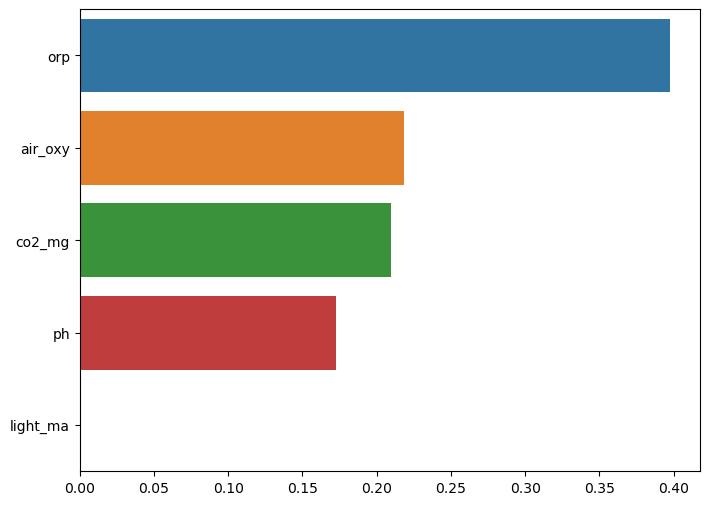

In [7]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

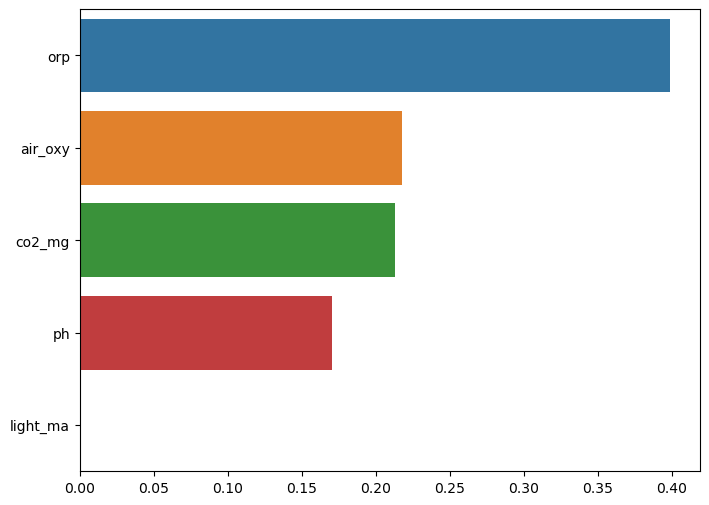

In [8]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

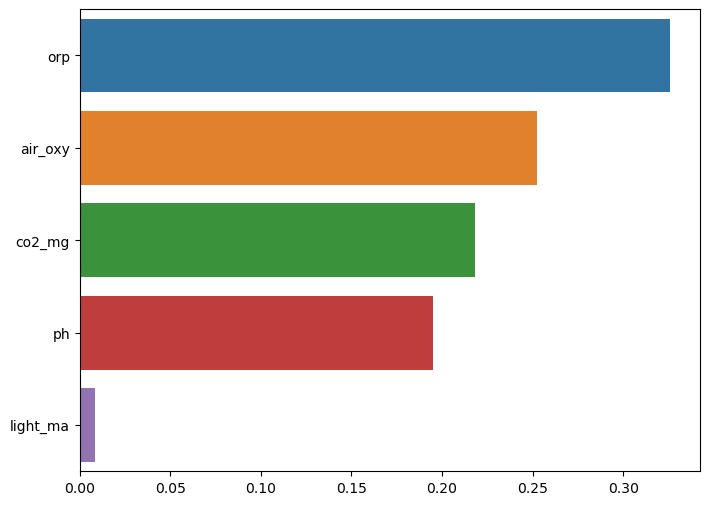

In [9]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

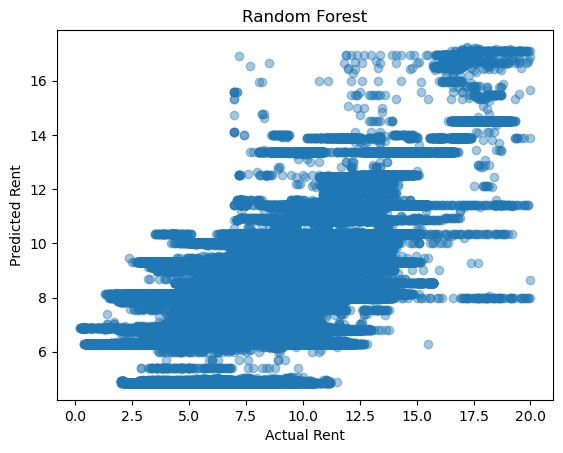

In [13]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, rf_train_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Random Forest")
plt.show()

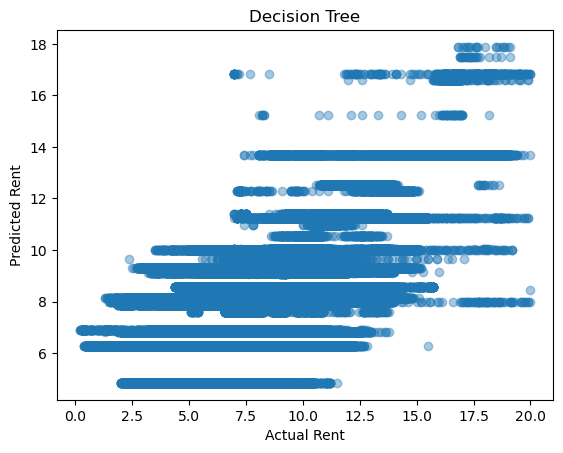

In [14]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, dt_train_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Decision Tree")
plt.show()

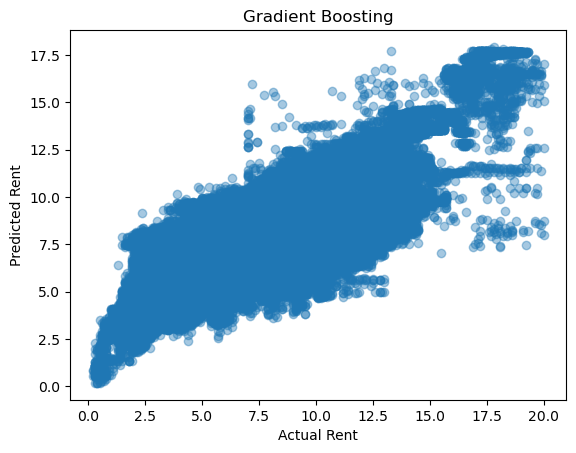

In [15]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, gb_train_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Gradient Boosting")
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#accuracy = accuracy_score(y_test, valid_predict)
confusion = confusion_matrix(y_test.values.ravel(), valid_predict)

print(f'Mean accuracy score: {confusion:.3}')

ValueError: continuous is not supported